<a href="https://colab.research.google.com/github/JoaquinLlanosGaete/evaluoCostokWh/blob/main/evaluarcostos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el consumo en kWh: 450
Costo estimado para 450 kWh: $124,510 CLP


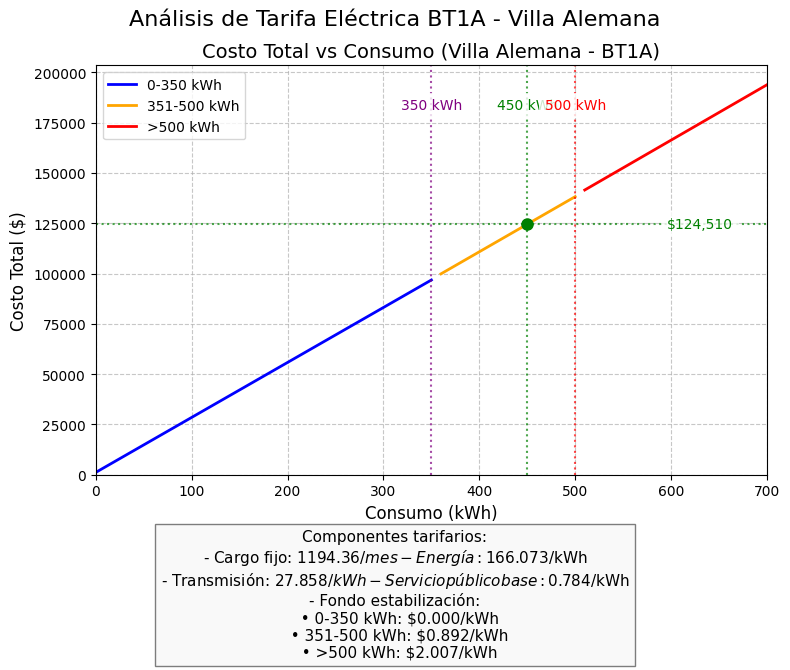

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Input del usuario
try:
    while True:
      user_kwh = int(input("Ingrese el consumo en kWh: "))
      if user_kwh <= 0 or user_kwh > 701:
        print("Ingrese un valor positivo y menor que 702.\n")
      else:
        break
except ValueError:
    print("Entrada no válida.")

# Datos específicos para Villa Alemana (BT1A)
cargo_fijo = 1194.36  # $/mes
cargo_energia = 166.073  # $/kWh
cargo_transmision = 27.858  # $/kWh
cargo_publico_base = 0.784  # $/kWh

# Rangos del fondo de estabilización
rangos_fondo = [
    {"limite": 350, "cargo": 0.000},
    {"limite": 500, "cargo": 0.892},
    {"limite": 1000, "cargo": 2.007},
    {"limite": 5000, "cargo": 2.787},
    {"limite": float('inf'), "cargo": 3.121}
]


def calcular_costo_definitivo(kwh):
    if kwh <= 350:
        tasa_fondo = 0.0
    elif 350 < kwh <= 500:
        tasa_fondo = 0.893  # $/kWh
    elif 500 < kwh <= 1000:
        tasa_fondo = 2.007  # $/kWh
    else:
        tasa_fondo = 3.121

    return (
        1195
        + 244.28 * kwh
        + 28.86 * kwh
        + tasa_fondo * kwh
    )


consumo = np.arange(0, 701, 10)
costo_total = [calcular_costo_definitivo(kwh) for kwh in consumo]
# costo_promedio = [costo / kwh if kwh > 0 else 0 for costo, kwh in zip(costo_total, consumo)]
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(wspace=0.3)

ax1.plot(consumo, costo_total, 'b-', linewidth=2)
ax1.set_title('Costo Total vs Consumo (Villa Alemana - BT1A)', fontsize=14)
ax1.set_xlabel('Consumo (kWh)', fontsize=12)
ax1.set_ylabel('Costo Total ($)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xlim(0, 700)
ax1.set_ylim(0, max(costo_total) * 1.05)

"""
# Gráfico 2: Costo Promedio por kWh (Comentado por solicitud del usuario)
ax2.plot(consumo[1:], costo_promedio[1:], 'r-', linewidth=2)
ax2.set_title('Costo Promedio por kWh', fontsize=14)
ax2.set_xlabel('Consumo (kWh)', fontsize=12)
ax2.set_ylabel('Costo Promedio ($/kWh)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xlim(0, 700)
ax2.set_ylim(0, 1000)
"""

total = calcular_costo_definitivo(user_kwh)
print(f"Costo estimado para {user_kwh} kWh: ${total:,.0f} CLP")

umbrales = [user_kwh, 350, 500]
colores = ['green', 'purple', 'red']

for umbral, color in zip(umbrales, colores):
    ax1.axvline(x=umbral, color=color, linestyle='dotted', alpha=0.7)
    y_pos = ax1.get_ylim()[1] * 0.92
    ax1.text(umbral, y_pos, f'{umbral} kWh',
            color=color, ha='center', va='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

if user_kwh > 0:
    ax1.axhline(y=total, color='green', linestyle='dotted', alpha=0.7)
    ax1.text(ax1.get_xlim()[1] * 0.95, total, f'${total:,.0f}',
             color='green', ha='right', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    ax1.plot(user_kwh, total, 'go', markersize=8)


info_text = (
    "Componentes tarifarios:\n"
    f"- Cargo fijo: ${cargo_fijo:.2f}/mes"
    f"- Energía: ${cargo_energia:.3f}/kWh\n"
    f"- Transmisión: ${cargo_transmision:.3f}/kWh"
    f"- Servicio público base: ${cargo_publico_base:.3f}/kWh\n"
    "- Fondo estabilización:\n"
    "  • 0-350 kWh: $0.000/kWh\n"
    "  • 351-500 kWh: $0.892/kWh\n"
    "  • >500 kWh: $2.007/kWh"
)
fig.text(0.5, -0.1, info_text, ha='center', fontsize=11, bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.suptitle('Análisis de Tarifa Eléctrica BT1A - Villa Alemana', fontsize=16)
plt.show()